## <center> IOT Temperature Data - Data Preprocessing and Visualization </center>

In [13]:
#Import libraries
import numpy as np                    # linear algebra /as computational purposes
import pandas as pd                   # Data processing/manipulation, CSV file I/O 
import matplotlib.pyplot as plt       # Broding purposes
import seaborn as sns                 # 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Load data

In [14]:
IOT= pd.read_csv('IOT-temp.csv')
IOT

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


Here, We deal with dataset of 5 attributes and 97606 records

In [15]:
IOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


## Shape

In [16]:
IOT.shape

(97606, 5)

### Describe data

In [17]:
IOT.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


### TYPE

In [18]:
IOT.dtypes

id            object
room_id/id    object
noted_date    object
temp           int64
out/in        object
dtype: object

## Check the attributes data types and Drop out unwanted columns like id , room_id.

In [19]:
IOT1 = IOT.drop(['id', 'room_id/id'], axis = 1)
IOT1

,noted_date,temp,out/in
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In
...,...,...,...
97601,28-07-2018 07:07,31,In
97602,28-07-2018 07:07,31,In
97603,28-07-2018 07:06,31,In
97604,28-07-2018 07:06,31,In


### Number of missing values

In [20]:
column_names = IOT.columns
for column in column_names:
    print(column + ' - ' + str(IOT[column].isnull().sum()))

id - 0
room_id/id - 0
noted_date - 0
temp - 0
out/in - 0


In [21]:
IOT1.isnull().sum()

noted_date    0
temp          0
out/in        0
dtype: int64

We havn't any null values in dataset

In [24]:
IOT1['noted_date'] = pd.to_datetime(IOT1['noted_date'])

IOT1['date'] = IOT1['noted_date'].dt.date
IOT1['time'] = IOT1['noted_date'].dt.time

IOT1

,noted_date,temp,out/in,date,time
0,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00
1,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00
2,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00
3,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00
4,2018-08-12 09:29:00,31,In,2018-08-12,09:29:00
...,...,...,...,...,...
97601,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00
97602,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00
97603,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00
97604,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00


### Separate out date and time values of noted_date column

### Further separate date,month,year from date and store as separate columns. Display the complete data with new columns.

In [25]:
IOT1['date'] = pd.to_datetime(IOT1['date'])

IOT1['year'] = IOT1['date'].dt.year
IOT1['month'] = IOT1['date'].dt.month
IOT1['day'] = IOT1['date'].dt.day
IOT1

,noted_date,temp,out/in,date,time,year,month,day
0,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00,2018,8,12
1,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00,2018,8,12
2,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00,2018,8,12
3,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00,2018,8,12
4,2018-08-12 09:29:00,31,In,2018-08-12,09:29:00,2018,8,12
...,...,...,...,...,...,...,...,...
97601,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00,2018,7,28
97602,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00,2018,7,28
97603,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00,2018,7,28
97604,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00,2018,7,28


In [26]:
IOT2 = IOT1.drop(['date'], axis = 1)
IOT2 = IOT1.drop(['noted_date'], axis = 1)
IOT2

,temp,out/in,date,time,year,month,day
0,29,In,2018-08-12,09:30:00,2018,8,12
1,29,In,2018-08-12,09:30:00,2018,8,12
2,41,Out,2018-08-12,09:29:00,2018,8,12
3,41,Out,2018-08-12,09:29:00,2018,8,12
4,31,In,2018-08-12,09:29:00,2018,8,12
...,...,...,...,...,...,...,...
97601,31,In,2018-07-28,07:07:00,2018,7,28
97602,31,In,2018-07-28,07:07:00,2018,7,28
97603,31,In,2018-07-28,07:06:00,2018,7,28
97604,31,In,2018-07-28,07:06:00,2018,7,28


### before plotting we sepreate out data in two different dataframes 

### Converting 'In' to '1' and 'Out' to '0'

In [28]:
IOT2.replace('In', 0, inplace = True)
IOT2.replace('Out', 1, inplace = True)

IOT2

,temp,out/in,date,time,year,month,day
0,29,0,2018-08-12,09:30:00,2018,8,12
1,29,0,2018-08-12,09:30:00,2018,8,12
2,41,1,2018-08-12,09:29:00,2018,8,12
3,41,1,2018-08-12,09:29:00,2018,8,12
4,31,0,2018-08-12,09:29:00,2018,8,12
...,...,...,...,...,...,...,...
97601,31,0,2018-07-28,07:07:00,2018,7,28
97602,31,0,2018-07-28,07:07:00,2018,7,28
97603,31,0,2018-07-28,07:06:00,2018,7,28
97604,31,0,2018-07-28,07:06:00,2018,7,28


In [29]:
IOT2_in = IOT2[IOT2["out/in"] == 0]
IOT2_out = IOT2[IOT2["out/in"] == 1]

#### 2 : based on Outside temperature

In [40]:
IOT2_in.reset_index(drop = True)
IOT2_in

,temp,out/in,date,time,year,month,day
0,29,0,2018-08-12,09:30:00,2018,8,12
1,29,0,2018-08-12,09:30:00,2018,8,12
4,31,0,2018-08-12,09:29:00,2018,8,12
5,31,0,2018-08-12,09:29:00,2018,8,12
6,29,0,2018-08-12,09:28:00,2018,8,12
...,...,...,...,...,...,...,...
97601,31,0,2018-07-28,07:07:00,2018,7,28
97602,31,0,2018-07-28,07:07:00,2018,7,28
97603,31,0,2018-07-28,07:06:00,2018,7,28
97604,31,0,2018-07-28,07:06:00,2018,7,28


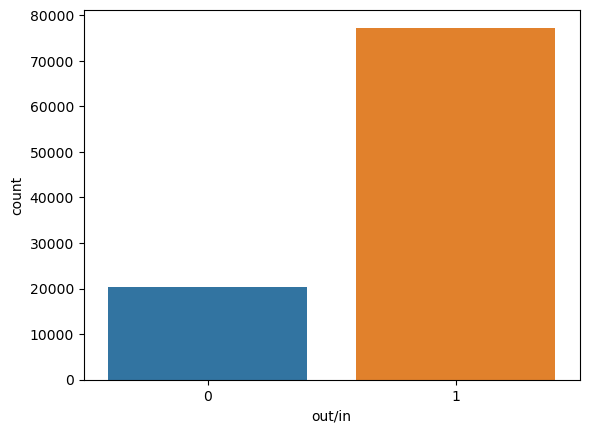

In [41]:
# Plot of count of Inside and Outside
sns.countplot(IOT2['out/in']);

we have 20000 records of temp_in and 77606 records of temp_out.

## Prepare boxplot of temprature.

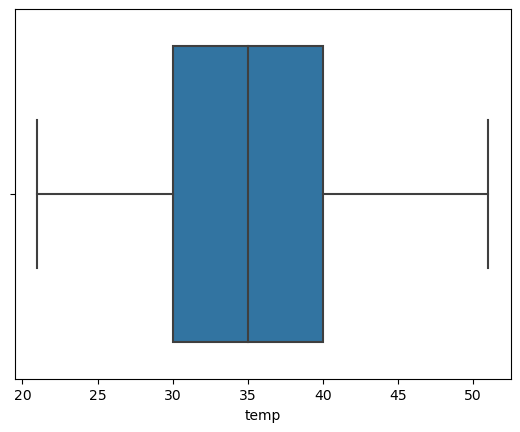

In [32]:
sns.boxplot(IOT2['temp'])
plt.show()

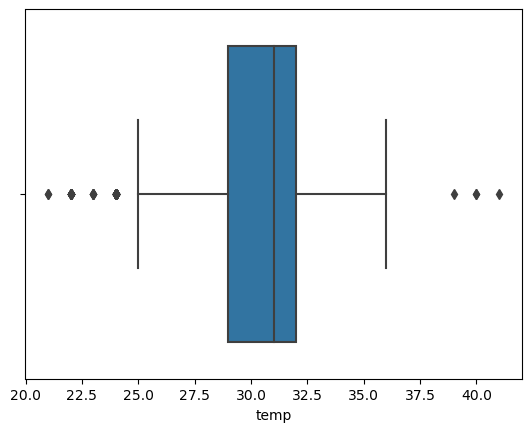

In [33]:
# Inside temperature 
sns.boxplot(IOT2_in['temp'])
plt.show()

Here we have Outlires in temperature column for temp_in.

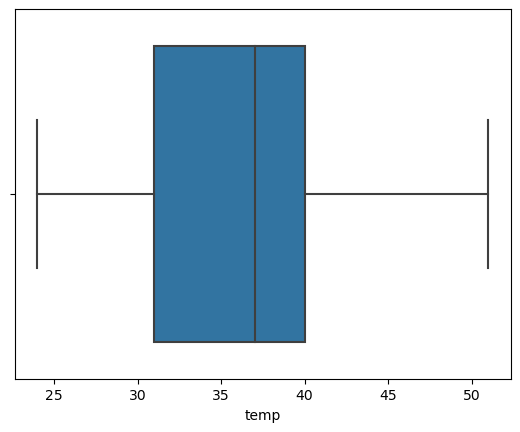

In [34]:
# Outside temperature 
sns.boxplot(IOT2_out['temp'])
plt.show()

# Prepare barplot for in/out vs temperature.

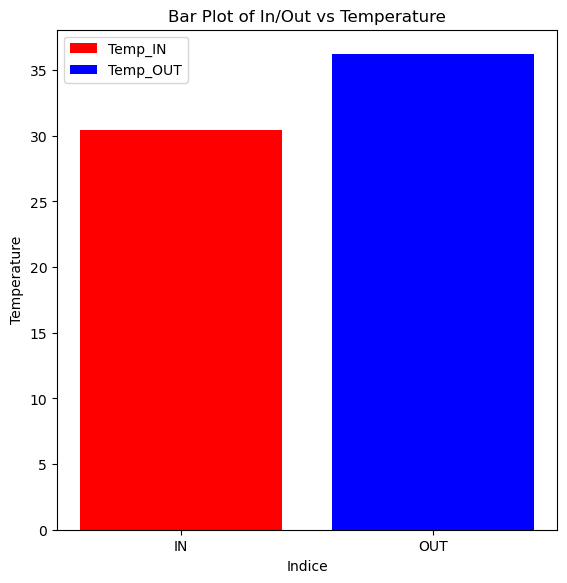

In [35]:
fig = plt.figure(figsize=(5,5));
ax = fig.add_axes([0,0,1,1])

x = ['IN', 'OUT']
y_in = IOT2_in['temp'].mean()
y_out = IOT2_out['temp'].mean()

ax.bar(x[0], y_in, color = 'red')
ax.bar(x[1], y_out, color = 'blue')

ax.set_xlabel('Indice')
ax.set_ylabel('Temperature')
ax.legend(["Temp_IN", "Temp_OUT"])
ax.set_title('Bar Plot of In/Out vs Temperature')
plt.show()

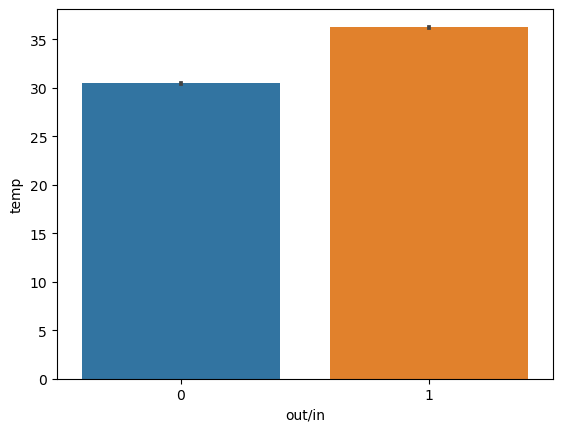

In [36]:
sns.barplot(IOT2['out/in'],IOT2['temp'])
plt.show()